In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
df=pd.read_csv("Pitchforkcleaned.csv",encoding = "ISO-8859-1")
df=df.drop('Unnamed: 0',axis=1)
df=df.loc[df['Reissue']==0]

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 5)
plt.figure(figsize=(10,5))

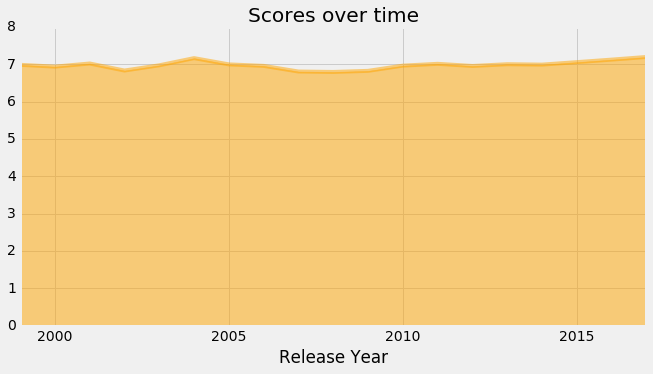

In [15]:
df[df['Release Year']>1998].groupby('Release Year').mean()['scores'].plot(title="Scores over time",ylim=[0,8],kind="area",color="orange",alpha=.5)

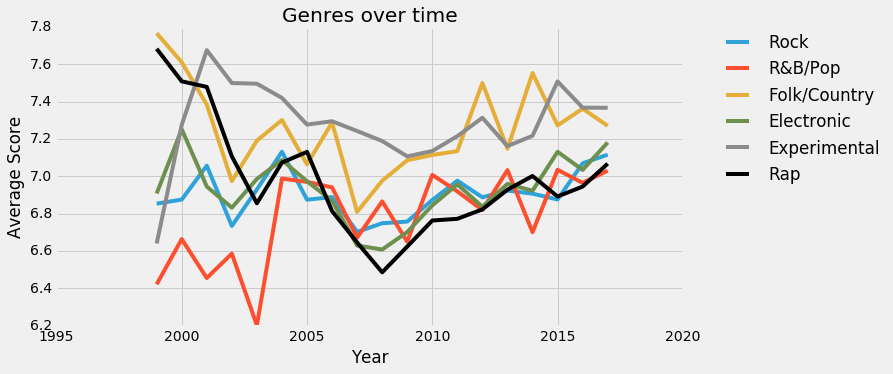

In [43]:
fig,ax=plt.subplots()
ax.plot(df[(df['rock']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "Rock")
ax.plot(df[(df['r&b']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "R&B/Pop")
ax.plot(df[(df['folk']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "Folk/Country")
ax.plot(df[(df['electronic']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "Electronic")
ax.plot(df[(df['experimental']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "Experimental")
ax.plot(df[(df['rap']==1) & (df['Release Year']>1998)].groupby('Release Year')['scores'].mean(), label = "Rap",color="black")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Genres over time")
plt.xlabel("Year")
plt.ylabel("Average Score")

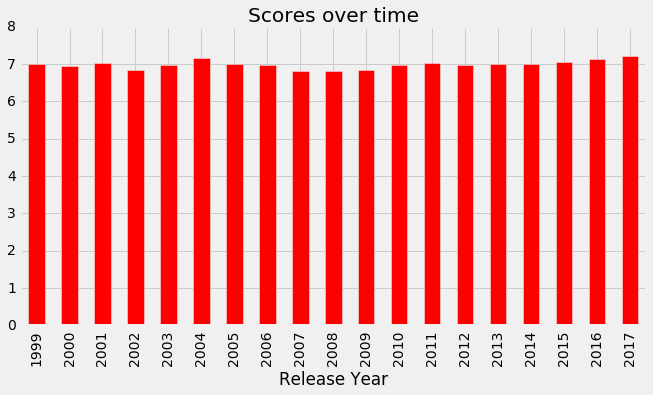

In [16]:
df[df['Release Year']>1998].groupby('Release Year').mean()['scores'].plot(title="Scores over time",ylim=[0,8],kind="bar",color='red')

In [18]:
print("electronic",df['electronic'].sum()," pop",df['pop'].sum(),"r&b",df['r&b'].sum())
print("rap",df['rap'].sum()," experimental",df['experimental'].sum(),"rock",df['rock'].sum())
print("global",df['global'].sum()," folk",df['folk'].sum()," country",df['country'].sum())
print("jazz",df['jazz'].sum())

electronic 4087  pop 1565 r&b 1565
rap 1655  experimental 2027 rock 9997
global 253  folk 748  country 748
jazz 470


In [19]:
print("electronic ",df.loc[df['electronic']==1,'scores'].mean())
print("rock ",df.loc[df['rock']==1,'scores'].mean())
print("rap ",df.loc[df['rap']==1,'scores'].mean())
print("r&b ",df.loc[df['r&b']==1,'scores'].mean())
print("jazz ",df.loc[df['jazz']==1,'scores'].mean())
print("global ",df.loc[df['global']==1,'scores'].mean())
print("folk ",df.loc[df['folk']==1,'scores'].mean())
print("pop ",df.loc[df['pop']==1,'scores'].mean())
print("experimental ",df.loc[df['experimental']==1,'scores'].mean())
print("country ",df.loc[df['country']==1,'scores'].mean())

electronic  6.9469782236359405
rock  6.969150745223621
rap  6.917039274924467
r&b  6.928242811501597
jazz  7.360638297872338
global  7.540316205533591
folk  7.209491978609612
pop  6.928242811501597
experimental  7.355698075974338
country  7.209491978609612


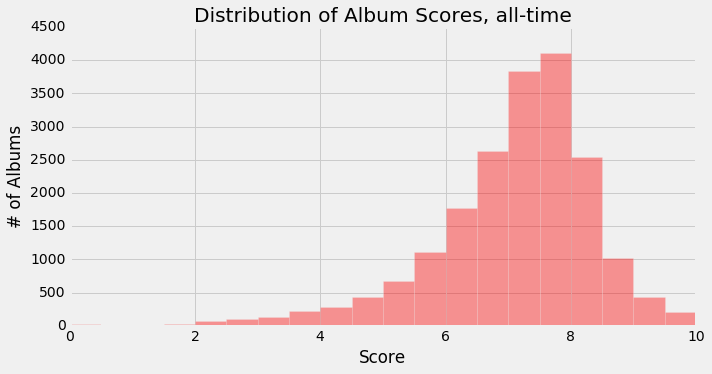

In [23]:
ax=df['scores'].plot.hist(bins=20,title="Distribution of Album Scores, all-time",color='red',alpha=.4)
ax.set_xlabel("Score")
ax.set_ylabel("# of Albums")

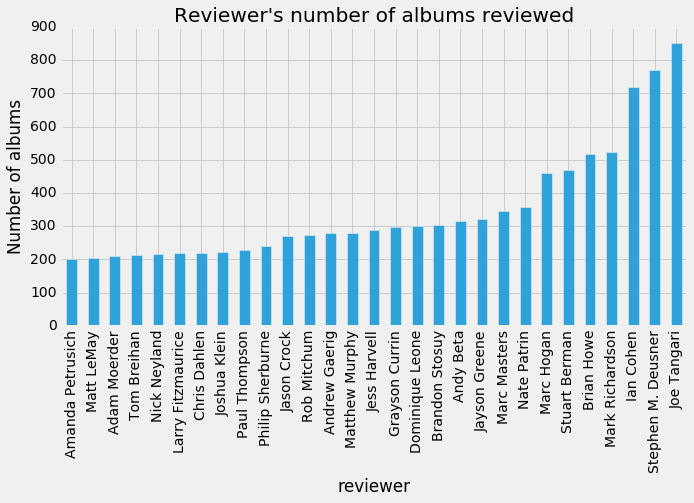

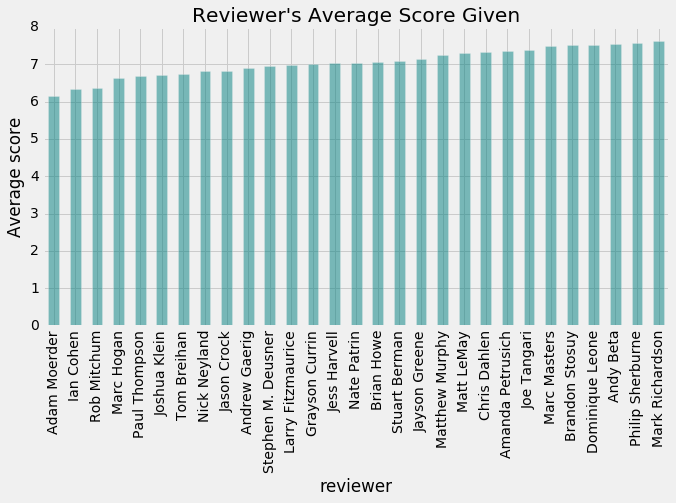

In [22]:
reviewers=df.groupby('reviewer').count()[['album']].sort_values('album')
reviewers=reviewers.loc[reviewers['album']>200]
ax=reviewers.plot.bar(legend=False,title="Reviewer's number of albums reviewed")
ax.set_ylabel("Number of albums")
reviewersmean=df.groupby('reviewer').mean()[['scores']]
reviewersmean=reviewersmean.loc[reviewers.reset_index()['reviewer']].sort_values('scores')
ax2=reviewersmean.plot.bar(legend=False,alpha=.5,color="teal",title="Reviewer's Average Score Given")
ax2.set_ylabel("Average score")

In [27]:
df

,artists,album,genre,scores,years,labels,dates,reviewer,Release Year,day,...,Prev6,Prev7,Prev8,Prev9,Prev10,Wait,Major,MajorIndie,Label Switch,Other
0,Ø,Konstellaatio,NaN,7.4,2014,Sahko,2014-02-27,Grayson Haver Currin,2014,27,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
1,Ólöf Arnalds,Innundir Skinni,Pop/R&B,8.0,2010,One Little Indian,2010-10-26,Jayson Greene,2010,26,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
2,Ólafur Arnalds,Now I Am Winter,Rock,5.5,2013,Mercury,2013-04-09,Brian Howe,2013,9,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0,0,1,1
3,Ólafur Arnalds,Living Room Songs,Rock,4.5,2012,Erased Tapes,2012-02-16,Joe Colly,2012,16,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,0,1
4,Ólafur Arnalds,Another Happy Day OST,Rock,6.2,2012,Erased Tapes,2012-02-16,Joe Colly,2012,16,...,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0,0,0,1
5,Ólafur Arnalds,...And They Have Escaped the Weight of Darkness,Rock,7.0,2010,Erased Tapes,2010-06-10,Brian Howe,2010,10,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0,0,0,1
6,Ólafur Arnalds,Found Songs,Rock,6.3,2009,Erased Tapes,2010-02-16,Brian Howe,2009,16,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
7,Ævangelist,Omen Ex Simulacra,NaN,7.0,2013,Debemur Morti,2013-12-11,Kim Kelly,2013,11,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
8,Âme,Live,NaN,7.3,2012,Innervisions,2012-05-16,Tim Finney,2012,16,...,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,0,0,1,1
9,Âme,Fabric 42,NaN,6.9,2009,Fabric,2009-02-25,Tim Finney,2009,25,...,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0,0,1,1
